# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [16]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2]


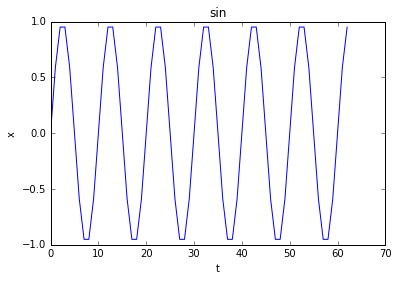

In [17]:
f = 1
t = np.arange(0,2*np.pi/f,0.1)
s = np.sin(2* np.pi*f*t)

print t
plt.plot(s)
plt.xlabel('t')
plt.ylabel('x')
plt.title('sin')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

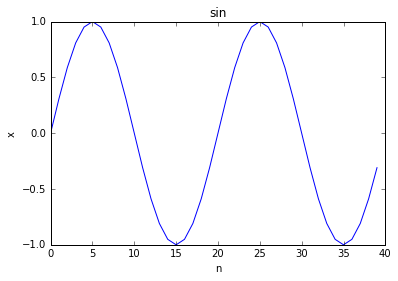

In [18]:
n = np.arange(0,40,1)
s = np.sin(0.1*np.pi*n)
plt.figure
plt.plot(s)
plt.xlabel('n')
plt.ylabel('x')
plt.title('sin')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

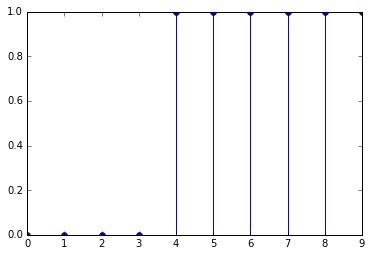

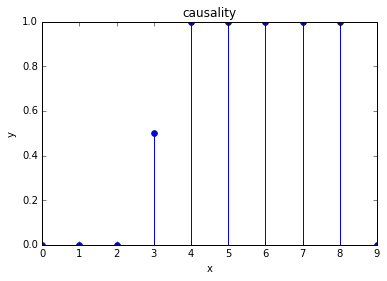

In [19]:
N = 10
x = np.zeros((N,))
x[4:N] = 1;

plt.figure()
plt.stem(x)
plt.show()

y = np.zeros((N,))
for i in range (0,N-1):
    y[i] = (x[i]+x[i+1])/2
    
plt.figure()
plt.stem(y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('causality')
plt.show()

**1.2** Propose a modification to obtain a causal version

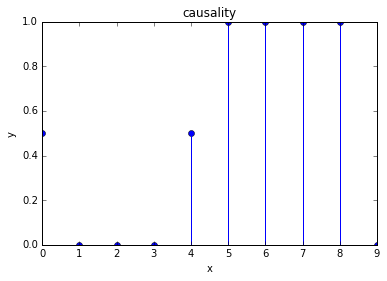

In [20]:
y = np.zeros((N,))
for i in range (0,N-1):
    y[i] = (x[i-1]+x[i])/2
    
plt.figure()
plt.stem(y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('causality')
plt.show()

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



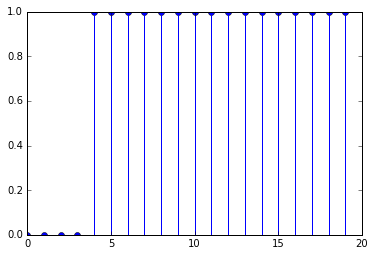

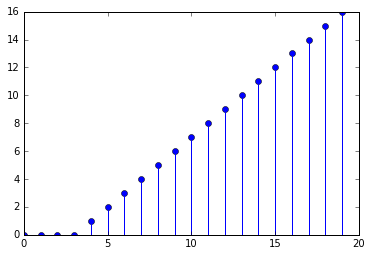

In [21]:
N = 20
x = np.zeros((N,))
x[4:N] = 1;

plt.stem(x)
plt.figure()
plt.show()

def prim(f):
    for i in range (0,N-1):
        f [i+1]+= f[i];
        
    return f

plt.stem(prim(x))
plt.figure()
plt.show()


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

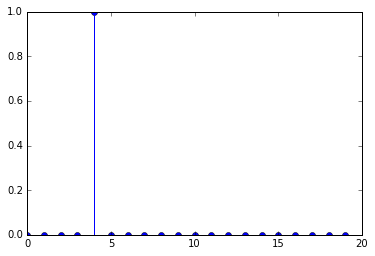

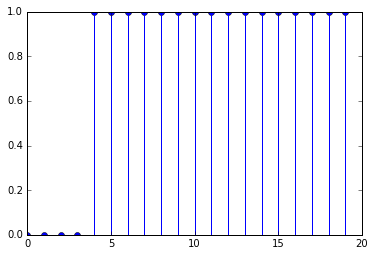

In [22]:
s = np.zeros((N,))
s[4]=1
plt.stem(s)
plt.figure()
plt.show()

plt.stem(prim(s))
plt.figure()
plt.show()


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

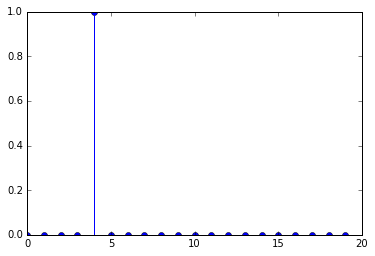

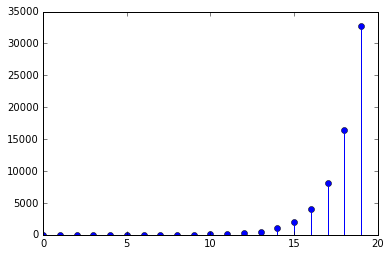

In [23]:
s = np.zeros((N,))
s[4]=1
plt.stem(s)
plt.figure()
plt.show()

g = np.zeros((N,))
for i in range (1,N):
    g[i] = s[i]+2*g[i-1]


plt.figure()
plt.stem(g)
plt.show()

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

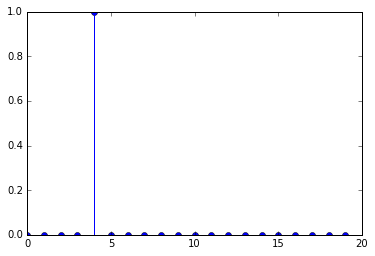

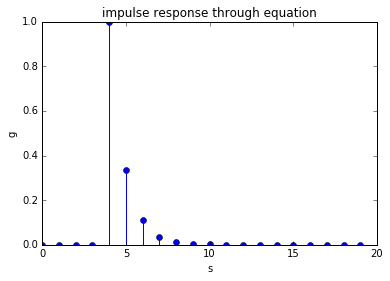

In [24]:
s = np.zeros((N,))
s[4]=1
plt.stem(s)
plt.figure()
plt.show()

g = np.zeros((N,))
for i in range (1,N):
    g[i] = s[i]+g[i-1]/3

plt.figure()
plt.stem(g)
plt.xlabel('s')
plt.ylabel('g')
plt.title('impulse response through equation')
plt.show()

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


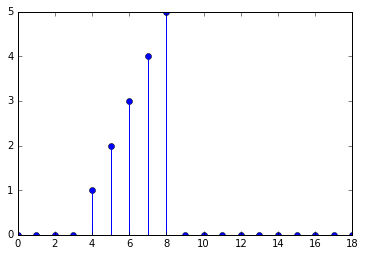

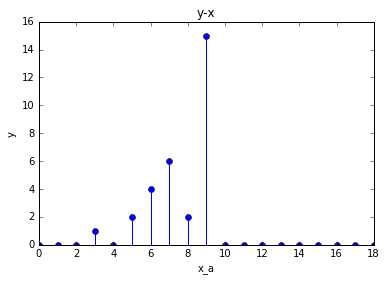

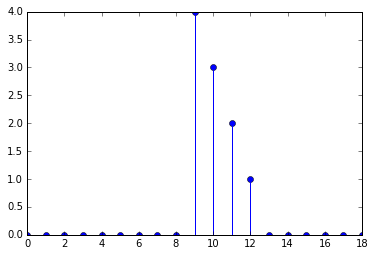

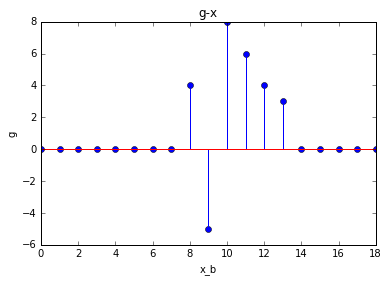

In [25]:
x_a = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
x_b = np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])

y = np.zeros((19,))
for i in range (0,18):
    y[i]=3*x_a[i-1]-2*x_a[i]+x_a[i+1]

plt.stem(x_a)
plt.figure()
plt.stem(y)
plt.xlabel('x_a')
plt.ylabel('y')
plt.title('y-x')
plt.show()

g = np.zeros((19,))
for i in range (0,18):
    g[i]=3*x_b[i-1]-2*x_b[i]+x_b[i+1]
  
plt.stem(x_b)
plt.figure()
plt.stem(g)
plt.xlabel('x_b')
plt.ylabel('g')
plt.title('g-x')
plt.show()

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


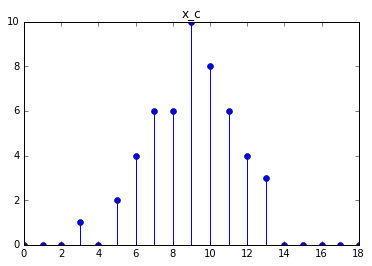

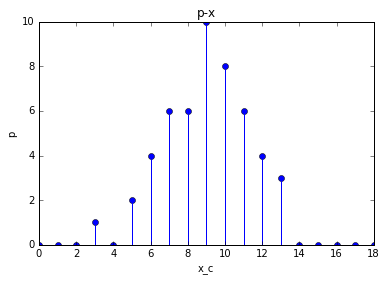

In [26]:
x_c = x_a + x_b

    
plt.figure()
plt.stem(y+g)
plt.title('x_c')
plt.show()

p = np.zeros((19,))
for i in range (0,18):
    p[i]=3*x_c[i-1]-2*x_c[i]+x_c[i+1]

plt.figure()
plt.stem(p)
plt.xlabel('x_c')
plt.ylabel('p')
plt.title('p-x')
plt.show()

**3.3** Propose a nonlinear/noninvariant system.

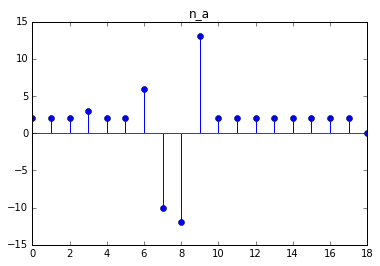

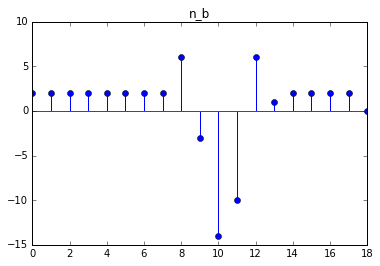

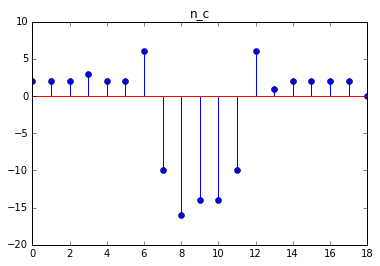

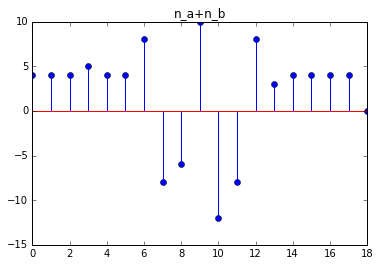

In [27]:
n_a = np.zeros((19,))
for i in range (0,18):
    n_a[i]=3*x_a[i-1]^2-2*x_a[i]+x_a[i+1]
    
plt.figure()
plt.stem(n_a)
plt.title('n_a')
plt.show()

n_b = np.zeros((19,))
for i in range (0,18):
    n_b[i]=3*x_b[i-1]^2-2*x_b[i]+x_b[i+1]
    
plt.figure()
plt.stem(n_b)
plt.title('n_b')
plt.show()

n_c = np.zeros((19,))
for i in range (0,18):
    n_c[i]=3*x_c[i-1]^2-2*x_c[i]+x_c[i+1]
    
plt.figure()
plt.stem(n_c)
plt.title('n_c')
plt.show()

plt.figure()
plt.stem(n_a+n_b)
plt.title('n_a+n_b')
plt.show()